<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/estatistica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisão Rápida

- Medidas de Tendência Central --> Sintetizar um dataset através de um único valor
    - Moda, Mediana, Media
        - Outlier: Media considera tudo e, por isso, é afetada por outliers (o outlier puxa a média pra perto dele)
        - Outlier: Mediana considera o ponto do meio do dataset (o lado bom disso é que ela é menos afetada por outliers)
                
    - Medias geometrica, aritmetica e harmônica
        - harmonica: uma média que penaliza valores muito baixos

- Medidas de Dispersão
    - Range, Desvio Padrão, Variância
        - Variância: Informação contida numa variável

- Distribuições
    - Frequências (histograma)
    - kde - Kernel Density Estimation
        - Gaussian Distribution


# Distribuição Gaussiana
> Objetivos: Observar as propriedades da distribuição normal com dados reais.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/vehicles_messy.csv', low_memory=False)

In [ ]:
data.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0.0,0.0,0.0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0.0,0.0,0.0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0.0,0.0,0.0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0.0,0.0,0.0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0.0,0.0,0.0


In [ ]:
data.shape

(25009, 83)

In [ ]:
data.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UHighway,UHighwayA,year,youSaveSpend,c240Dscr,charge240b,c240bDscr,phevCity,phevHwy,phevComb
count,25009.000000,25009.000000,25009.0,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,25009.000000,...,25008.000000,25008.000000,25008.000000,25008.000000,0.0,25008.0,0.0,25008.000000,25008.000000,25008.000000
mean,17.796690,0.226162,0.0,0.003979,17.379543,1.488663,0.421368,0.127983,0.000014,0.080359,...,32.788330,0.775079,2000.068258,-2810.670585,NaN,0.0,NaN,0.010837,0.010996,0.010917
std,4.353395,1.182291,0.0,0.168479,4.932743,5.479459,2.442064,1.583376,0.002213,2.201278,...,8.403612,4.403584,8.875407,2492.857875,NaN,0.0,NaN,0.781276,0.792303,0.787139
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1984.000000,-22250.000000,NaN,0.0,NaN,0.000000,0.000000,0.000000
25%,14.982273,0.000000,0.0,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,26.923100,0.000000,1994.000000,-4250.000000,NaN,0.0,NaN,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,32.369600,0.000000,2002.000000,-2500.000000,NaN,0.0,NaN,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,37.300000,0.000000,2007.000000,-1250.000000,NaN,0.0,NaN,0.000000,0.000000,0.000000
max,47.087143,8.323333,0.0,12.000000,126.000000,126.400000,101.000000,101.430000,0.350000,122.000000,...,141.400000,146.414000,2013.000000,3750.000000,NaN,0.0,NaN,63.000000,62.000000,62.000000


# Outliers (!)


In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
barrels08,25009.0,17.796690,4.353395,0.06,14.982273,17.347895,20.600625,47.087143
barrelsA08,25009.0,0.226162,1.182291,0.00,0.000000,0.000000,0.000000,8.323333
charge120,25009.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
charge240,25009.0,0.003979,0.168479,0.00,0.000000,0.000000,0.000000,12.000000
city08,25009.0,17.379543,4.932743,6.00,14.000000,17.000000,19.000000,126.000000
...,...,...,...,...,...,...,...,...
charge240b,25008.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
c240bDscr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phevCity,25008.0,0.010837,0.781276,0.00,0.000000,0.000000,0.000000,63.000000
phevHwy,25008.0,0.010996,0.792303,0.00,0.000000,0.000000,0.000000,62.000000


In [ ]:
stats = data.describe().T
stats['IQR'] = stats['75%'] - stats['25%']
stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,25009.0,17.796690,4.353395,0.06,14.982273,17.347895,20.600625,47.087143,5.618352
barrelsA08,25009.0,0.226162,1.182291,0.00,0.000000,0.000000,0.000000,8.323333,0.000000
charge120,25009.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
charge240,25009.0,0.003979,0.168479,0.00,0.000000,0.000000,0.000000,12.000000,0.000000
city08,25009.0,17.379543,4.932743,6.00,14.000000,17.000000,19.000000,126.000000,5.000000
...,...,...,...,...,...,...,...,...,...
charge240b,25008.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
c240bDscr,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phevCity,25008.0,0.010837,0.781276,0.00,0.000000,0.000000,0.000000,63.000000,0.000000
phevHwy,25008.0,0.010996,0.792303,0.00,0.000000,0.000000,0.000000,62.000000,0.000000


# Visualizando outilers usando distribuição de variáveis
    - Inter-quartile range rule
    - 3 standard-deviation rule

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Curva Gaussiana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.9972

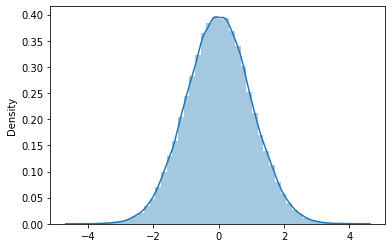

In [ ]:
N = 100000
y = np.random.normal(size=N)
sns.distplot(y)

1 - len(y[(y > np.mean(y) + 3 * np.std(y)) | (y < np.mean(y) - 3 * np.std(y))]) / len(y)

## Caso Prático

In [ ]:
data.barrels08

0        15.695714
1        29.964545
2        12.207778
3        29.964545
4        17.347895
           ...    
25004    17.347895
25005    21.974000
25006    21.974000
25007    23.543571
25008    21.974000
Name: barrels08, Length: 25009, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


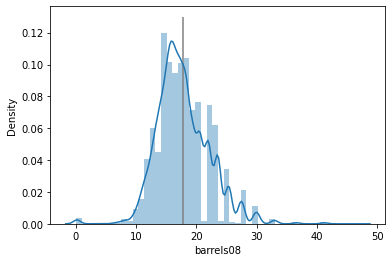

In [ ]:
sns.distplot(data.barrels08)

x = data.barrels08.mean()

plt.vlines(x, 0, 0.13, color='gray')

In [ ]:
std = stats.loc['barrels08', 'std']
mean = data.barrels08.mean()

In [ ]:
mean - std

13.443295235960445

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

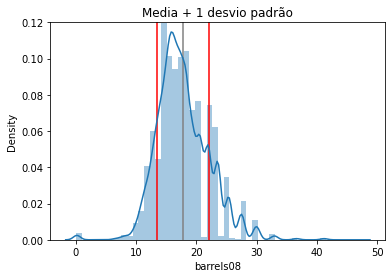

In [ ]:
sns.distplot(data.barrels08)

x = data.barrels08.mean()

plt.title('Media + 1 desvio padrão')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + std, 0, 0.13, color='red')
plt.vlines(mean - std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [ ]:
# data.query(f'barrels08 > {mean - std} and barrels08 < {mean + std}')

In [ ]:
data.query(f'{mean - std} < barrels08 < {mean + std}').shape[0] / data.shape[0]

0.7399736095005798

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

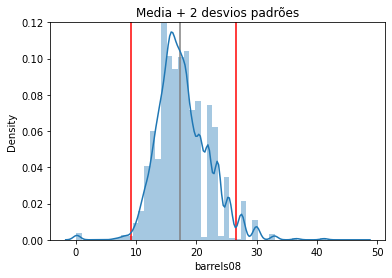

In [ ]:
sns.distplot(data.barrels08)

x = data.barrels08.median()
plt.title('Media + 2 desvios padrões')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + 2 * std, 0, 0.13, color='red')
plt.vlines(mean - 2 * std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [ ]:
data.query(f'{mean - 2 * std} < barrels08 < {mean + 2 * std}').shape[0] / data.shape[0]

0.9562957335359271

In [ ]:
data.barrels08.mean()

17.796689747473174

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.12)

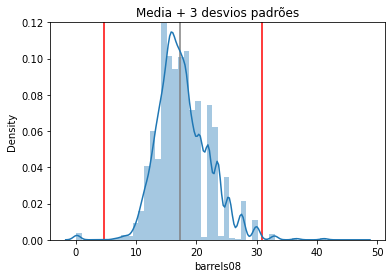

In [ ]:
sns.distplot(data.barrels08)
x = data.barrels08.median()
plt.title('Media + 3 desvios padrões')
plt.vlines(x, 0, 0.13, color='gray')
plt.vlines(mean + 3 * std, 0, 0.13, color='red')
plt.vlines(mean - 3 * std, 0, 0.13, color='red')
plt.ylim([0, 0.12])

In [ ]:
data.query(f'{mean - 3 * std} < barrels08 < {mean + 3 * std}').shape[0] / data.shape[0]

0.9913231236754768

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


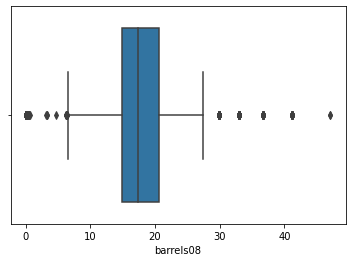

In [ ]:
sns.boxplot(data.barrels08)

In [ ]:
iqr = stats.loc['barrels08', 'IQR']
q3 = stats.loc['barrels08', '75%']
q1 = stats.loc['barrels08', '25%']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


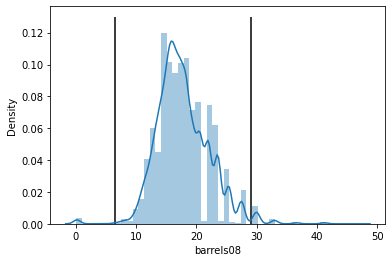

In [ ]:
sns.distplot(data.barrels08)
plt.vlines(x=q3 + 1.5 * iqr, ymin=0, ymax=0.13)
plt.vlines(x=q1 - 1.5 * iqr, ymin=0, ymax=0.13)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


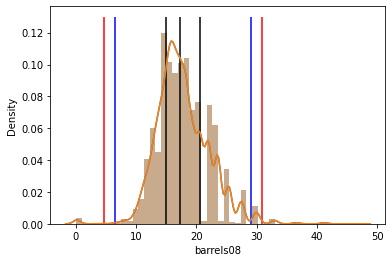

In [ ]:
sns.distplot(data.barrels08)

sns.distplot(data.barrels08)
plt.vlines(x=(stats.loc['barrels08']['25%'] - stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['barrels08']['75%'] + stats.loc['barrels08']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['barrels08']['25%'] ), ymin=0, ymax=0.13, color='k')
plt.vlines(x=(stats.loc['barrels08']['75%'] ), ymin=0, ymax=0.13, color='k')
plt.vlines(x=(stats.loc['barrels08']['50%'] ), ymin=0, ymax=0.13, color='k')




plt.vlines(x=(stats.loc['barrels08']['mean'] - stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13, color='red')
plt.vlines(x=(stats.loc['barrels08']['mean'] + stats.loc['barrels08']['std'] * 3 ), ymin=0, ymax=0.13, color='red')


plt.show()

In [ ]:
data.barrels08.describe()

count    25009.000000
mean        17.796690
std          4.353395
min          0.060000
25%         14.982273
50%         17.347895
75%         20.600625
max         47.087143
Name: barrels08, dtype: float64

# Distribuições Não Normais

In [ ]:
sns.distplot(data.pv4)

In [ ]:
sns.distplot(data.pv4, hist=False)

In [ ]:
data.pv4.describe()

In [ ]:
# só funciona para distribuições normais
sns.distplot(data.pv4, hist=False)
plt.vlines(x=(stats.loc['pv4']['25%'] - stats.loc['pv4']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.vlines(x=(stats.loc['pv4']['75%'] + stats.loc['pv4']['IQR'] * 1.5 ), ymin=0, ymax=0.13, color='red')
plt.show() 

In [ ]:
# só funciona para distribuições normais
sns.distplot(data.pv4, hist=False)
plt.vlines(x=(stats.loc['pv4']['mean'] - stats.loc['pv4']['std'] * 3 ), ymin=0, ymax=0.13, color='blue')
plt.vlines(x=(stats.loc['pv4']['mean'] + stats.loc['pv4']['std'] * 3 ), ymin=0, ymax=0.13, color='blue')
plt.show()


In [ ]:
data.describe().T

In [ ]:
data.fuelCostA08.plot(kind='hist')

In [ ]:
upper_limit = data.fuelCostA08.mean() + 3 * data.fuelCostA08.std()
lower_limit = data.fuelCostA08.mean() - 3 * data.fuelCostA08.std()

In [ ]:
data.fuelCostA08.plot(kind='hist')
plt.vlines(upper_limit, 0, 36000)
plt.ylim([0, 36000])

In [ ]:
data.fuelCostA08.describe()

In [ ]:
upper_limit = stats.loc['fuelCostA08', '75%'] + 1.5 * stats.loc['fuelCostA08', 'IQR']
lower_limit = stats.loc['fuelCostA08', '25%'] - 1.5 * stats.loc['fuelCostA08', 'IQR']

data.fuelCostA08.plot(kind='hist')
plt.vlines(upper_limit, 0, 36000, color='red')
plt.ylim([0, 36000])

In [ ]:
sns.boxplot(data.fuelCostA08)

In [ ]:
# por quê?
stats.loc['pv4']

In [ ]:
(data.pv4 != 0).sum()

In [ ]:
(data.pv4 != 0).mean()

In [ ]:
(data.fuelCostA08 != 0).mean()

In [ ]:
data.pv4.quantile(q=0.95)

In [ ]:
# sns.distplot(data.query('pv4 != 0').pv4)

In [ ]:
# sns.distplot(np.clip(data.pv4, data.pv4.quantile(q=0.70), data.pv4.max()), hist=False)

# Skewness

O quão assimétrica é sua curva

In [ ]:
N = 10000

In [ ]:
uniform = np.random.randint(0, 100, size=N)
sns.distplot(uniform)

In [ ]:
normal = np.random.normal(size=N)
sns.distplot(normal, hist=False)

In [ ]:
df = pd.DataFrame(normal, columns=['normal'])

In [ ]:
df

In [ ]:
df.normal.skew()

## Assimétrica para direita

In [ ]:
gamma = np.random.gamma(shape=0.5, size=N )
sns.distplot(gamma, hist=False)

plt.vlines(np.mean(gamma), 0, 1, color='red')
plt.vlines(np.median(gamma), 0, 1, color='k')

plt.ylim([0, 2])

In [ ]:
df['gamma'] = gamma

In [ ]:
df.skew()

## Assimétrica para esquerda

In [ ]:
beta = np.random.beta(a=500, b=0.01, size=N )
sns.distplot(beta, hist=False)

In [ ]:
df['beta'] = beta

In [ ]:
df['uniform'] = uniform

In [ ]:
df.skew()

In [ ]:
df.kurtosis()

In [ ]:
from scipy.stats import kurtosis

In [ ]:
kurtosis(df.gamma, fisher=True)

In [ ]:
data.barrels08.describe()

In [ ]:
data.pv4.describe()